# Imports

In [2]:
from datetime import datetime
import requests

import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image
from io import BytesIO

# Utils

In [3]:
def plot_barh(x, y, cores, image_url_list, xlabel, ylabel, title, img_height=0.35, img_width=0.35, x_displacement=1.5, x_text_displacement=1.5):
    plt.figure(figsize=(12, 8))  # Aumentar o tamanho do canvas para melhor visualização
    plt.barh(x, y, color=cores, zorder=2)

    for i, (valor, image_url) in enumerate(zip(y, image_url_list)):
        response = requests.get(image_url)
        if response.status_code == 200:
            image = Image.open(BytesIO(response.content))  # Carregar a imagem PNG
        else:
            raise RuntimeError(f"Erro ao baixar a imagem {image_url}: {response.status_code}")

        # Coordenadas para posicionar a imagem
        x_img = valor - x_displacement
        y_img = i
        plt.imshow(image, extent=[x_img - img_width, x_img + img_width, y_img - img_height, y_img + img_height], zorder=3, aspect='auto')

        # Inserir o número próximo à imagem
        plt.text(valor + x_text_displacement, i, str(valor), va='center', fontsize=10, zorder=4)

    # Adicionar títulos e labels
    plt.title(title, fontsize=16, fontweight='bold', loc='center')
    plt.xlabel(xlabel, fontsize=12, fontweight='bold')
    plt.ylabel(ylabel, fontsize=12, fontweight='bold')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Adicionar gridlines horizontais
    plt.grid(axis='x', linestyle='--', alpha=0.7, zorder=1)

    # Adicionar bordas às barras
    for bar in plt.gca().patches:
        bar.set_edgecolor('black')

    # Ajustar limites
    plt.xlim(0, max(y) * 1.1)
    plt.ylim(-0.5, len(x) - 0.5)
    plt.tight_layout()

    plt.show();

# Load Data

In [4]:
games_df = pd.read_csv('../../data/cinturao/games.csv')

In [5]:
games_df.head()

,Data,Mandante,Hor/Res,Visitante,Campo,Torneio,Fase,Pontos Mandante,Pontos Visitante,Vencedor,Defensor do Título
0,2008-10-25 14:00:00,Brown Spiders,33 - 10,Coritiba Crocodiles,NaN,Amistoso,NaN,33,10,Brown Spiders,-
1,2009-08-07 14:00:00,JEC Gladiators,08 - 21,Brown Spiders,NaN,torneio-touchdown-2009,NaN,8,21,Brown Spiders,Brown Spiders
2,2009-08-22 14:00:00,Brown Spiders,20 - 23,Coritiba Crocodiles,NaN,torneio-touchdown-2009,NaN,20,23,Coritiba Crocodiles,Brown Spiders
3,2009-09-12 14:00:00,Coritiba Crocodiles,31 - 21,JEC Gladiators,NaN,torneio-touchdown-2009,NaN,31,21,Coritiba Crocodiles,Coritiba Crocodiles
4,2009-10-11 14:00:00,Coritiba Crocodiles,12 - 20,Brown Spiders,NaN,torneio-touchdown-2009,NaN,12,20,Brown Spiders,Coritiba Crocodiles


In [6]:
games_df.tail()

,Data,Mandante,Hor/Res,Visitante,Campo,Torneio,Fase,Pontos Mandante,Pontos Visitante,Vencedor,Defensor do Título
160,2024-09-01 14:00:00,América Locomotiva,00 - 33,Sada Cruzeiro/Galo FA,Faculdade Universo - Belo Horizonte/MG,bfa-2024,NaN,0,33,Sada Cruzeiro/Galo FA,Sada Cruzeiro/Galo FA
161,2024-09-21 19:00:00,Sada Cruzeiro/Galo FA,36 - 02,Tubarões do Cerrado,CTE/UFMG - Belo Horizonte/MG,bfa-2024,NaN,36,2,Sada Cruzeiro/Galo FA,Sada Cruzeiro/Galo FA
162,2024-10-20 15:00:32,Sada Cruzeiro/Galo FA,07 - 00,Vasco Almirantes,NaN,bfa-2024,-,7,0,Sada Cruzeiro/Galo FA,Sada Cruzeiro/Galo FA
163,2024-11-09 14:00:30,Rondonópolis Hawks,03 - 16,Sada Cruzeiro/Galo FA,NaN,bfa-2024,NaN,3,16,Sada Cruzeiro/Galo FA,Sada Cruzeiro/Galo FA
164,2024-12-01 15:00:49,Recife Mariners,22 - 06,Sada Cruzeiro/Galo FA,NaN,bfa-2024,NaN,22,6,Recife Mariners,Sada Cruzeiro/Galo FA


In [7]:
len(games_df)

165

# Times com mais defesas de títulos

In [8]:
defensores_de_titulo = games_df['Defensor do Título'].value_counts().sort_values(ascending=True)
defensores_de_titulo

Defensor do Título
 -                         1
Istepôs FA                 1
São Paulo Storm            1
Foz Black Sharks           1
Palmeiras Locomotives      1
Vasco Almirantes           2
Almirantes FA              2
América Locomotiva         2
Contagem Inconfidentes     4
Brown Spiders              5
Fluminense Imperadores     6
Paraná HP                 10
Cuiabá Arsenal            11
Timbó Rex                 21
JEC Gladiators            23
Sada Cruzeiro/Galo FA     37
Coritiba Crocodiles       37
Name: count, dtype: int64

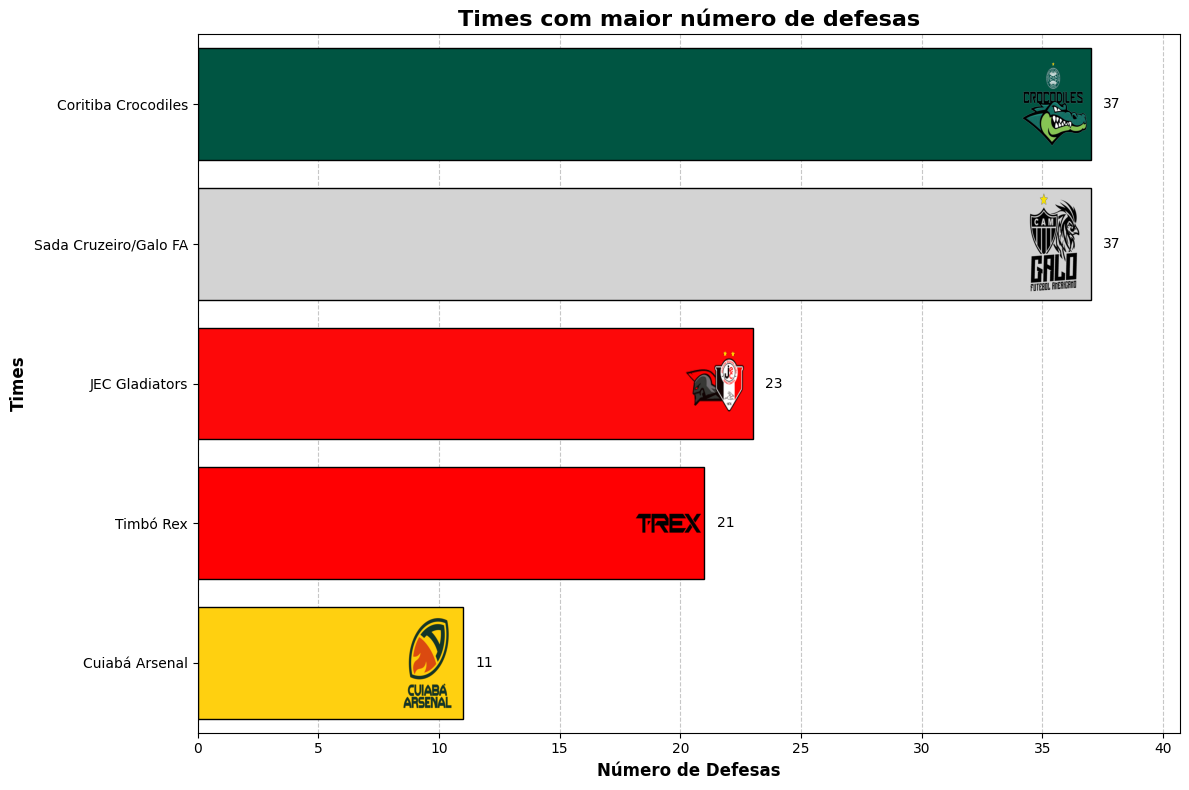

In [9]:
x = defensores_de_titulo.index.to_list()[-5:]
y = [ int(defesa) for defesa in list(defensores_de_titulo.values[-5:])]

cores = ['#FFD010', '#FF0002', '#FD0809', '#D3D3D3', '#005542']
image_url_list = ['https://www.salaooval.com.br/wp-content/uploads/2018/12/mt_cuiaba_arsenal_alt.png', 
                  'https://www.salaooval.com.br/wp-content/uploads/2018/12/sc_timbo_rex_alt.png', 
                  'https://www.salaooval.com.br/wp-content/uploads/2016/05/sc_jec_gladiators-128x128.png', 
                  'https://www.salaooval.com.br/wp-content/uploads/2018/12/mg_galo_fa_alt.png', 
                  'https://www.salaooval.com.br/wp-content/uploads/2022/02/pr_coritiba_crocodiles_alt.png']

plot_barh(x, y, cores, image_url_list, 'Número de Defesas', 'Times', 'Times com maior número de defesas', img_width=1.5, img_height=0.4, x_displacement=1.5, x_text_displacement=0.5)

In [10]:
defensores_do_titulo_df = pd.DataFrame({'Times': defensores_de_titulo.index, 'Número de Defesas': defensores_de_titulo}).reset_index(drop=True)
defensores_do_titulo_df = defensores_do_titulo_df.sort_values(by=['Número de Defesas'], ascending=False)

In [11]:
defensores_do_titulo_df

,Times,Número de Defesas
16,Coritiba Crocodiles,37
15,Sada Cruzeiro/Galo FA,37
14,JEC Gladiators,23
13,Timbó Rex,21
12,Cuiabá Arsenal,11
11,Paraná HP,10
10,Fluminense Imperadores,6
9,Brown Spiders,5
8,Contagem Inconfidentes,4
7,América Locomotiva,2


## Times com mais conquistas do Cinturão

In [12]:
vencedores_do_titulo = games_df[games_df['Vencedor'] != games_df['Defensor do Título']]['Vencedor'].value_counts().sort_values(ascending=True)
vencedores_do_titulo

Vencedor
Contagem Inconfidentes    1
Almirantes FA             1
Palmeiras Locomotives     1
Vasco Almirantes          1
São Paulo Storm           1
Foz Black Sharks          1
Istepôs FA                1
Recife Mariners           1
JEC Gladiators            2
Cuiabá Arsenal            2
Paraná HP                 2
Timbó Rex                 2
América Locomotiva        2
Fluminense Imperadores    2
Sada Cruzeiro/Galo FA     3
Brown Spiders             3
Coritiba Crocodiles       8
Name: count, dtype: int64

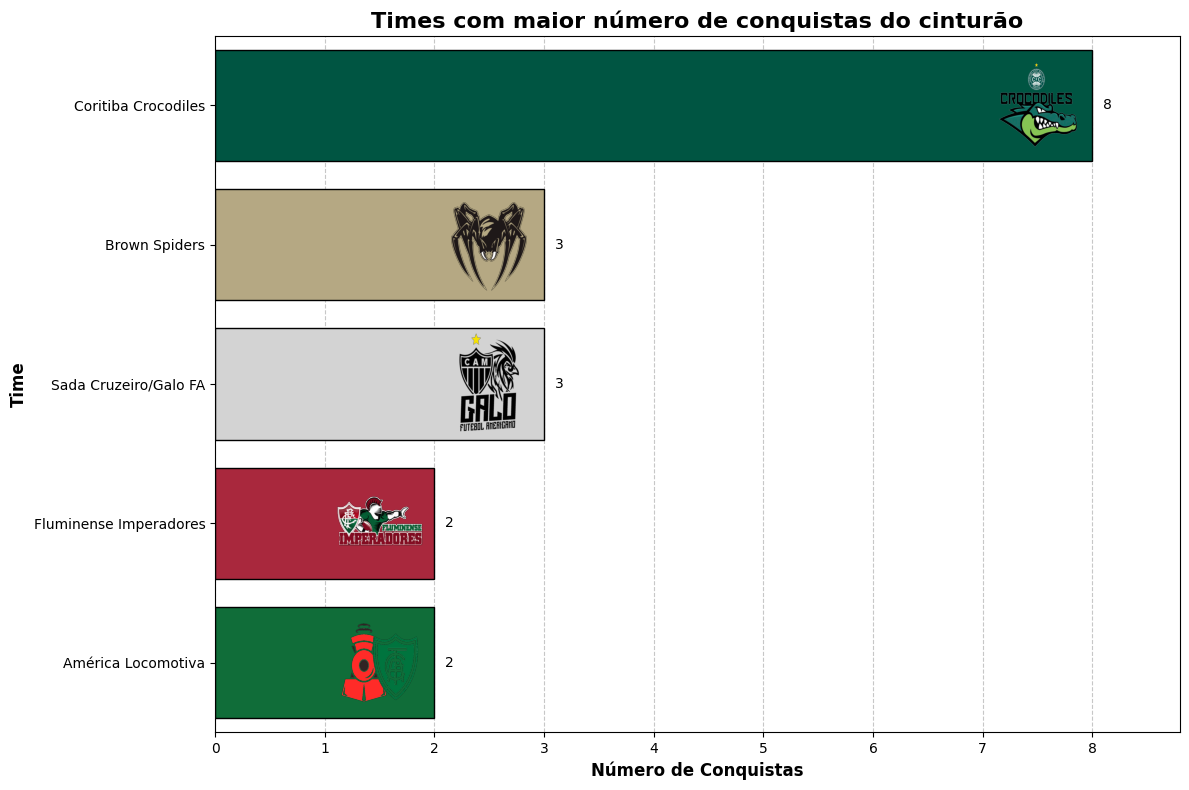

In [13]:
x = vencedores_do_titulo.index.to_list()[-5:]
y = [ int(defesa) for defesa in list(vencedores_do_titulo.values[-5:])]

cores = ['#106D39', '#A9283D', '#D3D3D3', '#B5A883', '#005542']
image_url_list = ['https://www.salaooval.com.br/wp-content/uploads/2017/12/mg_america_locomotiva.png', 
                  'https://www.salaooval.com.br/wp-content/uploads/2017/03/rj_fluminense_imperadores.png',
                  'https://www.salaooval.com.br/wp-content/uploads/2018/12/mg_galo_fa_alt.png',
                  'https://www.salaooval.com.br/wp-content/uploads/2022/07/pr_brown_spiders.png', 
                  'https://www.salaooval.com.br/wp-content/uploads/2022/02/pr_coritiba_crocodiles_alt.png']

plot_barh(x, y, cores, image_url_list, 'Número de Conquistas', 'Time', 'Times com maior número de conquistas do cinturão', img_width=0.4, img_height=0.4, x_displacement=0.5, x_text_displacement=0.1)

In [14]:
vencedores_do_titulo_df = pd.DataFrame({'Time': vencedores_do_titulo.index, 'Número de Partidas': vencedores_do_titulo}).sort_values(by=['Número de Partidas'], ascending=False).reset_index(drop=True)
vencedores_do_titulo_df

,Time,Número de Partidas
0,Coritiba Crocodiles,8
1,Brown Spiders,3
2,Sada Cruzeiro/Galo FA,3
3,Fluminense Imperadores,2
4,JEC Gladiators,2
5,Cuiabá Arsenal,2
6,Paraná HP,2
7,Timbó Rex,2
8,América Locomotiva,2
9,Contagem Inconfidentes,1


# Times que mais jogaram em partidas valendo o cinturão

In [15]:
games_df['Mandante'].value_counts()

Mandante
Sada Cruzeiro/Galo FA       26
Coritiba Crocodiles         25
Timbó Rex                   17
JEC Gladiators              13
Cuiabá Arsenal               8
Paraná HP                    7
Brown Spiders                6
Fluminense Imperadores       5
Contagem Inconfidentes       4
Goiânia Rednecks             3
Santa Maria Soldiers         3
Foz Black Sharks             3
América Locomotiva           3
São Paulo Storm              2
Istepôs FA                   2
Corupá Buffalos              2
Recife Mariners              2
Almirantes FA                2
Blumenau Riesen              2
PRC Guardian Saints          2
Brusque Admirals             1
Jaraguá Breakers             1
Porto Alegre Pumpkins        1
Santa Cruz Chacais           1
Brasil Devilz                1
Tubarão Predadores           1
Maringá Pyros                1
João Pessoa Espectros        1
UFPR Legends                 1
Sinop Coyotes                1
Jacarés do Pantanal          1
Rio Preto Weilers            1

In [16]:
games_df['Visitante'].value_counts()

Visitante
Coritiba Crocodiles         24
JEC Gladiators              14
Sada Cruzeiro/Galo FA       14
Timbó Rex                   11
Cuiabá Arsenal               9
Paraná HP                    8
América Locomotiva           7
Brown Spiders                7
Vasco Almirantes             6
Istepôs FA                   6
Juventude FA                 3
Fluminense Imperadores       3
São Paulo Storm              3
Contagem Inconfidentes       3
Jaraguá Breakers             3
Nova Serrana Forgeds         3
João Pessoa Espectros        3
Flamengo Imperadores         2
Londrina Bristlebacks        2
Corupá Buffalos              2
Brusque Admirals             2
Tubarão Predadores           2
Almirantes FA                2
Unicentro Knights            2
Maringá Pyros                2
Porto Alegre Pumpkins        1
Joinville Gladiators         1
Spartans Football            1
Cabritos FA                  1
Brasil Devilz                1
Sinop Coyotes                1
Black Hawks                  

In [17]:
valendo_cinturao = games_df['Mandante'].value_counts().add(games_df['Visitante'].value_counts(), fill_value=0).astype(int)

In [18]:
valendo_cinturao.head()

Almirantes FA          4
América Locomotiva    10
Black Hawks            1
Blaze FA               1
Blumenau Riesen        2
Name: count, dtype: int64

In [19]:
valendo_cinturao = valendo_cinturao.sort_values(ascending=True)

In [20]:
valendo_cinturao.tail()

Cuiabá Arsenal           17
JEC Gladiators           27
Timbó Rex                28
Sada Cruzeiro/Galo FA    40
Coritiba Crocodiles      49
Name: count, dtype: int64

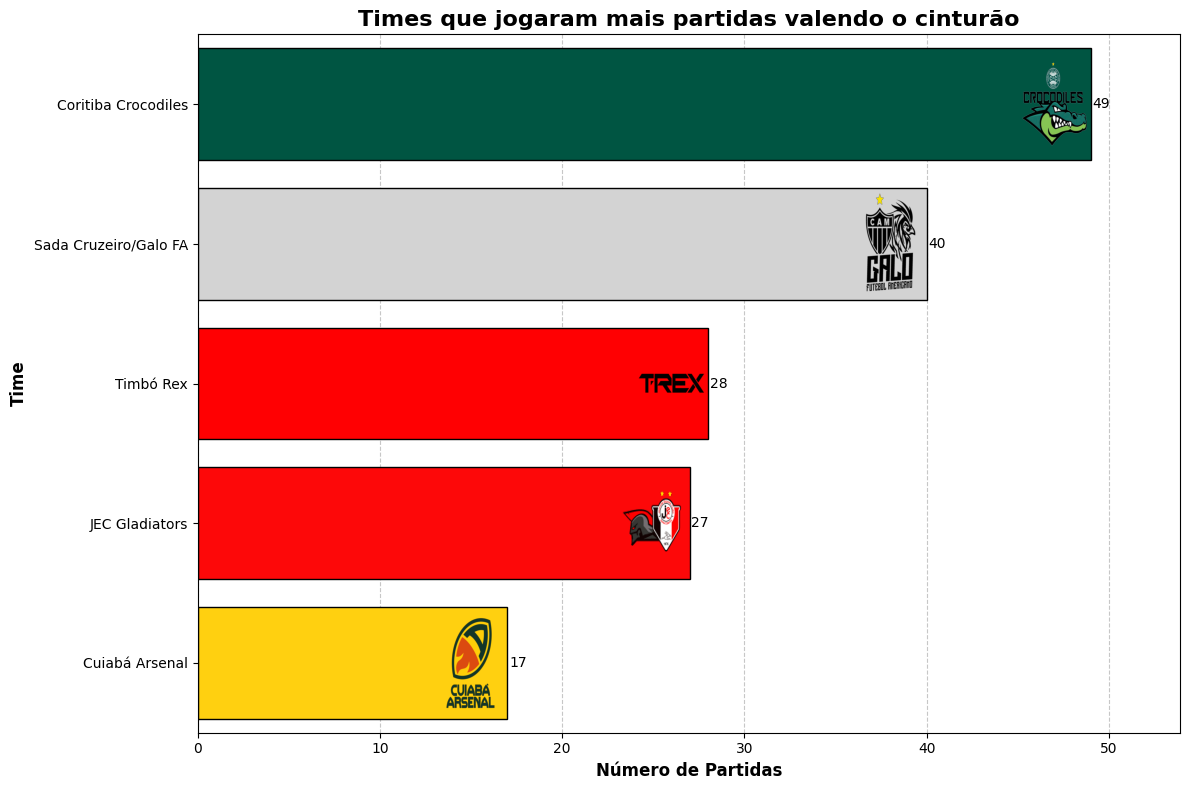

In [21]:
x = valendo_cinturao.index.to_list()[-5:]
y = valendo_cinturao.to_list()[-5:]

cores = ['#FFD010', '#FD0809', '#FF0002', '#D3D3D3', '#005542']
image_url_list = ['https://www.salaooval.com.br/wp-content/uploads/2018/12/mt_cuiaba_arsenal_alt.png',
                    'https://www.salaooval.com.br/wp-content/uploads/2016/05/sc_jec_gladiators-128x128.png' ,
                  'https://www.salaooval.com.br/wp-content/uploads/2018/12/sc_timbo_rex_alt.png', 
                  'https://www.salaooval.com.br/wp-content/uploads/2018/12/mg_galo_fa_alt.png', 
                  'https://www.salaooval.com.br/wp-content/uploads/2022/02/pr_coritiba_crocodiles_alt.png']

plot_barh(x, y, cores, image_url_list, 'Número de Partidas', 'Time', 'Times que jogaram mais partidas valendo o cinturão', img_width=2.0, img_height=0.4, x_displacement=2, x_text_displacement=0.1)

In [22]:
valendo_cinturao_df = pd.DataFrame({'Time': valendo_cinturao.index, 'Número de Partidas': valendo_cinturao}).sort_values(by=['Número de Partidas'], ascending=False).reset_index(drop=True)
valendo_cinturao_df

,Time,Número de Partidas
0,Coritiba Crocodiles,49
1,Sada Cruzeiro/Galo FA,40
2,Timbó Rex,28
3,JEC Gladiators,27
4,Cuiabá Arsenal,17
...,...,...
58,Macaé Oilers,1
59,Rondonópolis Hawks,1
60,Piratas da Serra,1
61,Norte Paraná,1


# Torneios com mais defesas de Títulos

## Utils

In [23]:
def tournament_postprocess(tournament):
    try:
        split_tournament = tournament.split('-')
    except Exception:
        return tournament
    
    split_tournament = ['BFA' if word == 'bfa' else word.capitalize() for word in split_tournament]
    new_tournament = ' '.join(split_tournament[:-1])

    return new_tournament
    



In [24]:
torneios = games_df['Torneio']
torneios

0                    Amistoso
1      torneio-touchdown-2009
2      torneio-touchdown-2009
3      torneio-touchdown-2009
4      torneio-touchdown-2009
                ...          
160                  bfa-2024
161                  bfa-2024
162                  bfa-2024
163                  bfa-2024
164                  bfa-2024
Name: Torneio, Length: 165, dtype: object

In [25]:
torneios = torneios.apply(lambda x: tournament_postprocess(x))

In [26]:
torneios.head()

0                     
1    Torneio Touchdown
2    Torneio Touchdown
3    Torneio Touchdown
4    Torneio Touchdown
Name: Torneio, dtype: object

In [27]:
torneios = torneios.value_counts().sort_values(ascending=True)
torneios

Torneio
                           1
Copa Ouro                  4
BFA Acesso                 4
Torneio Touchdown          5
Brasileirao                5
Campeonato Mineiro         7
Liga Brasileira           13
Campeonato Brasileiro     18
Superliga Nacional        22
Campeonato Catarinense    22
Campeonato Paranaense     22
BFA                       42
Name: count, dtype: int64

In [28]:
x = torneios.index.to_list()[-5:]
y = torneios.values[-5:]
x, y

(['Campeonato Brasileiro',
  'Superliga Nacional',
  'Campeonato Catarinense',
  'Campeonato Paranaense',
  'BFA'],
 array([18, 22, 22, 22, 42]))

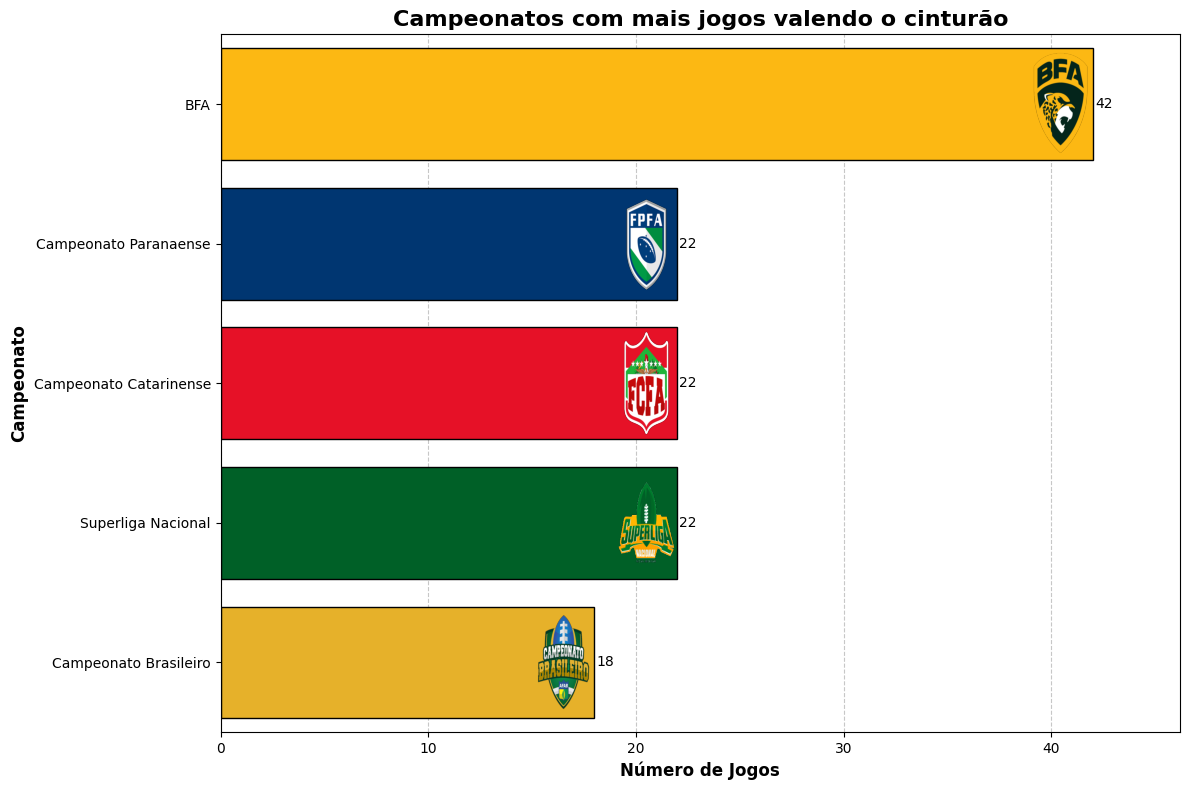

In [29]:
x = torneios.index.to_list()[-5:]
y = torneios.values[-5:]

cores = ['#E6B12A', '#006027', '#E61127', '#003671', '#FCB813']
image_url_list = ['https://www.salaooval.com.br/wp-content/uploads/2016/05/campeonato_brasileiro.png', 
                  'http://www.salaooval.com.br/wp-content/uploads/2016/05/superliga_nacional-150x150.png',
                  'https://www.salaooval.com.br/wp-content/uploads/2016/05/federacao_catarinense.png',
                  'https://www.salaooval.com.br/wp-content/uploads/2017/11/federecao_paranaense_fpfa.png', 
                  'https://www.ligabfa.com/images/bfa.png']

plot_barh(x, y, cores, image_url_list, 'Número de Jogos', 'Campeonato', 'Campeonatos com mais jogos valendo o cinturão', img_width=1.5, img_height=0.4, x_displacement=1.5, x_text_displacement=0.1)

In [30]:
torneios_df = pd.DataFrame({'Torneio': torneios.index, 'Número de Partidas': torneios}).sort_values(by=['Número de Partidas'], ascending=False).reset_index(drop=True)
torneios_df

,Torneio,Número de Partidas
0,BFA,42
1,Campeonato Catarinense,22
2,Campeonato Paranaense,22
3,Superliga Nacional,22
4,Campeonato Brasileiro,18
5,Liga Brasileira,13
6,Campeonato Mineiro,7
7,Torneio Touchdown,5
8,Brasileirao,5
9,Copa Ouro,4


# Times que mais perderam jogos valendo o cinturão

In [31]:
mandantes_perderam_jogo_titulo = games_df[games_df['Vencedor'] != games_df['Mandante']]
visitantes_perderam_jogo_titulo = games_df[games_df['Vencedor'] != games_df['Visitante']]

len(mandantes_perderam_jogo_titulo), len(visitantes_perderam_jogo_titulo)

(77, 88)

In [32]:
mandantes_perderam_jogo_titulo = mandantes_perderam_jogo_titulo['Mandante']
visitantes_perderam_jogo_titulo = visitantes_perderam_jogo_titulo['Visitante']

In [33]:
mandantes_perderam_jogo_titulo

1           JEC Gladiators
2            Brown Spiders
4      Coritiba Crocodiles
5            Brown Spiders
6               Istepôs FA
              ...         
154          Almirantes FA
157     América Locomotiva
159              Manaus FA
160     América Locomotiva
163     Rondonópolis Hawks
Name: Mandante, Length: 77, dtype: object

In [34]:
visitantes_perderam_jogo_titulo

0        Coritiba Crocodiles
3             JEC Gladiators
7           Brusque Admirals
8           Jaraguá Breakers
9            Corupá Buffalos
               ...          
156     Nova Serrana Forgeds
158         Vasco Almirantes
161      Tubarões do Cerrado
162         Vasco Almirantes
164    Sada Cruzeiro/Galo FA
Name: Visitante, Length: 88, dtype: object

In [35]:
perderam_jogo_titulo = pd.concat([mandantes_perderam_jogo_titulo, visitantes_perderam_jogo_titulo], ignore_index=True)
perderam_jogo_titulo.head()

0         JEC Gladiators
1          Brown Spiders
2    Coritiba Crocodiles
3          Brown Spiders
4             Istepôs FA
dtype: object

In [36]:
perderam_jogo_titulo = perderam_jogo_titulo.value_counts().sort_values(ascending=True)
perderam_jogo_titulo

Rondonópolis Hawks       1
Manaus FA                1
Spartans Football        1
Norte Paraná             1
Itapema White Sharks     1
                        ..
Timbó Rex                7
Istepôs FA               7
Brown Spiders            8
América Locomotiva       8
Coritiba Crocodiles     12
Name: count, Length: 63, dtype: int64

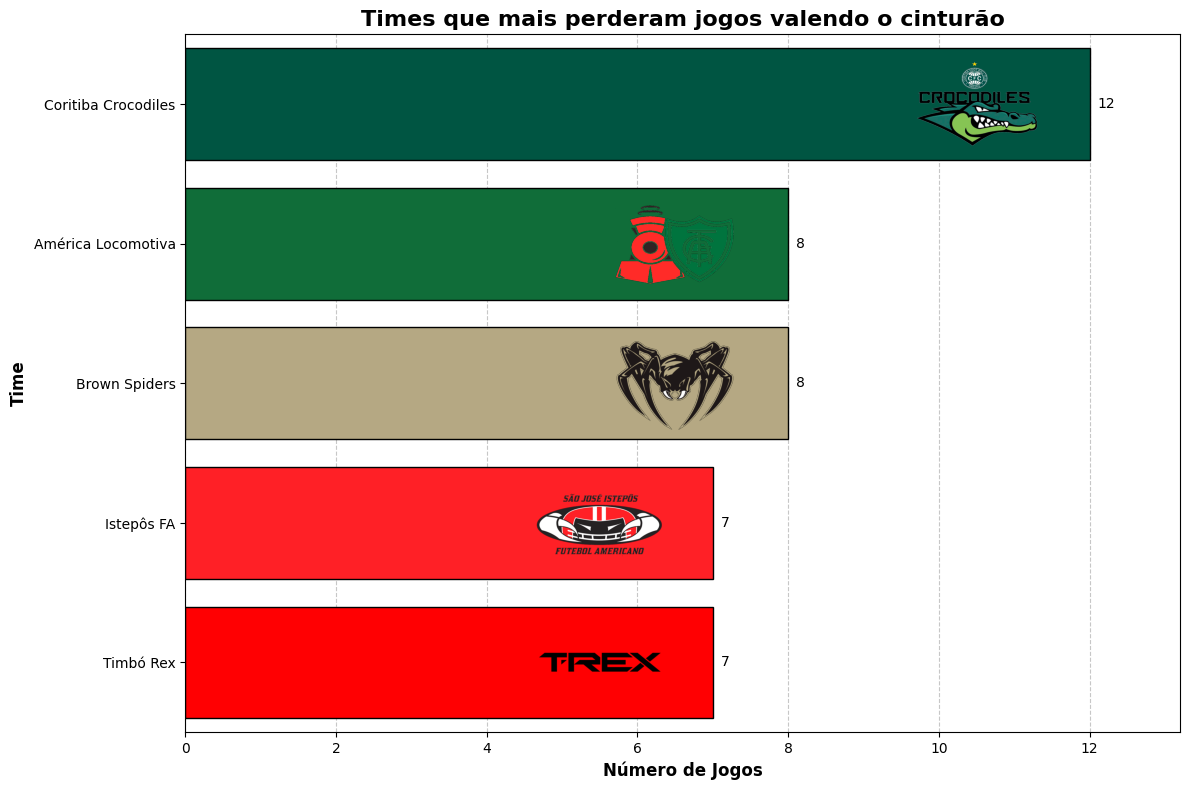

In [37]:
x = perderam_jogo_titulo.index.to_list()[-5:]
y = perderam_jogo_titulo.values[-5:]

cores = ['#FF0002', '#FF2026', '#B5A883', '#106D39', '#005542']
image_url_list = ['https://www.salaooval.com.br/wp-content/uploads/2018/12/sc_timbo_rex_alt.png', 
                  'https://www.salaooval.com.br/wp-content/uploads/2018/01/sc_sao_jose_istepos_alt.png',
                  'https://www.salaooval.com.br/wp-content/uploads/2022/07/pr_brown_spiders.png',
                  'https://www.salaooval.com.br/wp-content/uploads/2017/12/mg_america_locomotiva.png', 
                  'https://www.salaooval.com.br/wp-content/uploads/2022/02/pr_coritiba_crocodiles_alt.png']

plot_barh(x, y, cores, image_url_list, 'Número de Jogos', 'Time', 'Times que mais perderam jogos valendo o cinturão', img_width=0.9, img_height=0.4, x_displacement=1.5, x_text_displacement=0.1)

In [38]:
perderam_jogo_titulo_df = pd.DataFrame({'Time': perderam_jogo_titulo.index, 'Número de Partidas': perderam_jogo_titulo}).sort_values(by=['Número de Partidas'], ascending=False).reset_index(drop=True)
perderam_jogo_titulo_df

,Time,Número de Partidas
0,Coritiba Crocodiles,12
1,Brown Spiders,8
2,América Locomotiva,8
3,Timbó Rex,7
4,Istepôs FA,7
...,...,...
58,Black Hawks,1
59,Corinthians Steamrollers,1
60,Palmeiras Locomotives,1
61,Blaze FA,1


## Times com mais Perdas do Cinturão

In [39]:
perdedores_do_titulo = games_df[games_df['Vencedor'] != games_df['Defensor do Título']]['Defensor do Título'].value_counts().sort_values(ascending=True)
perdedores_do_titulo

Defensor do Título
Foz Black Sharks          1
Vasco Almirantes          1
Contagem Inconfidentes    1
Palmeiras Locomotives     1
São Paulo Storm           1
Istepôs FA                1
 -                        1
Almirantes FA             1
JEC Gladiators            2
América Locomotiva        2
Cuiabá Arsenal            2
Paraná HP                 2
Fluminense Imperadores    2
Timbó Rex                 2
Brown Spiders             3
Sada Cruzeiro/Galo FA     3
Coritiba Crocodiles       8
Name: count, dtype: int64

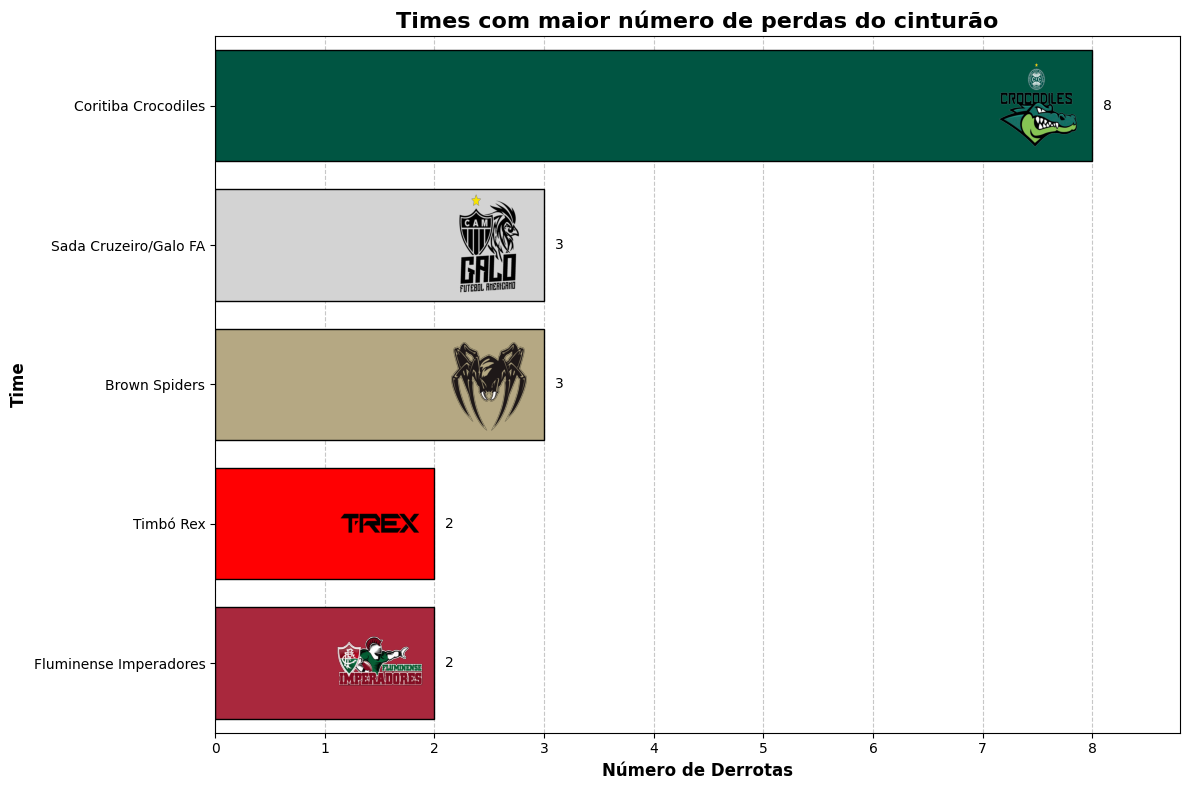

In [40]:
x = perdedores_do_titulo.index.to_list()[-5:]
y = [ int(defesa) for defesa in list(perdedores_do_titulo.values[-5:])]

cores = ['#A9283D', '#FF0002', '#B5A883', '#D3D3D3','#005542']
image_url_list = ['https://www.salaooval.com.br/wp-content/uploads/2017/03/rj_fluminense_imperadores.png', 
                  'https://www.salaooval.com.br/wp-content/uploads/2018/12/sc_timbo_rex_alt.png',
                  'https://www.salaooval.com.br/wp-content/uploads/2022/07/pr_brown_spiders.png', 
                  'https://www.salaooval.com.br/wp-content/uploads/2018/12/mg_galo_fa_alt.png',
                  'https://www.salaooval.com.br/wp-content/uploads/2022/02/pr_coritiba_crocodiles_alt.png']

plot_barh(x, y, cores, image_url_list, 'Número de Derrotas', 'Time', 'Times com maior número de perdas do cinturão', img_width=0.4, img_height=0.4, x_displacement=0.5, x_text_displacement=0.1)

In [41]:
perdedores_do_titulo_df = pd.DataFrame({'Time': perdedores_do_titulo.index, 'Número de Partidas': perdedores_do_titulo}).sort_values(by=['Número de Partidas'], ascending=False).reset_index(drop=True)
perdedores_do_titulo_df

,Time,Número de Partidas
0,Coritiba Crocodiles,8
1,Sada Cruzeiro/Galo FA,3
2,Brown Spiders,3
3,Timbó Rex,2
4,JEC Gladiators,2
5,América Locomotiva,2
6,Cuiabá Arsenal,2
7,Paraná HP,2
8,Fluminense Imperadores,2
9,Foz Black Sharks,1


# Equipes que ficaram mais tempo com o cinturão

In [42]:
games_df.head(30)

,Data,Mandante,Hor/Res,Visitante,Campo,Torneio,Fase,Pontos Mandante,Pontos Visitante,Vencedor,Defensor do Título
0,2008-10-25 14:00:00,Brown Spiders,33 - 10,Coritiba Crocodiles,NaN,Amistoso,NaN,33,10,Brown Spiders,-
1,2009-08-07 14:00:00,JEC Gladiators,08 - 21,Brown Spiders,NaN,torneio-touchdown-2009,NaN,8,21,Brown Spiders,Brown Spiders
2,2009-08-22 14:00:00,Brown Spiders,20 - 23,Coritiba Crocodiles,NaN,torneio-touchdown-2009,NaN,20,23,Coritiba Crocodiles,Brown Spiders
3,2009-09-12 14:00:00,Coritiba Crocodiles,31 - 21,JEC Gladiators,NaN,torneio-touchdown-2009,NaN,31,21,Coritiba Crocodiles,Coritiba Crocodiles
4,2009-10-11 14:00:00,Coritiba Crocodiles,12 - 20,Brown Spiders,NaN,torneio-touchdown-2009,NaN,12,20,Brown Spiders,Coritiba Crocodiles
5,2009-11-07 14:00:00,Brown Spiders,00 - 12,JEC Gladiators,NaN,torneio-touchdown-2009,NaN,0,12,JEC Gladiators,Brown Spiders
6,2009-11-10 14:00:00,Istepôs FA,00 - 28,JEC Gladiators,NaN,campeonato-catarinense-2009,NaN,0,28,JEC Gladiators,JEC Gladiators
7,2009-11-15 14:00:00,JEC Gladiators,41 - 06,Brusque Admirals,NaN,campeonato-catarinense-2009,NaN,41,6,JEC Gladiators,JEC Gladiators
8,2010-04-07 14:00:00,JEC Gladiators,21 - 16,Jaraguá Breakers,NaN,campeonato-catarinense-2010,NaN,21,16,JEC Gladiators,JEC Gladiators
9,2010-05-02 14:00:00,JEC Gladiators,51 - 06,Corupá Buffalos,NaN,campeonato-catarinense-2010,NaN,51,6,JEC Gladiators,JEC Gladiators


In [43]:
teste = games_df[ (games_df['Vencedor'] == 'Brown Spiders') | (games_df['Defensor do Título'] == 'Brown Spiders') ]
teste

,Data,Mandante,Hor/Res,Visitante,Campo,Torneio,Fase,Pontos Mandante,Pontos Visitante,Vencedor,Defensor do Título
0,2008-10-25 14:00:00,Brown Spiders,33 - 10,Coritiba Crocodiles,NaN,Amistoso,NaN,33,10,Brown Spiders,-
1,2009-08-07 14:00:00,JEC Gladiators,08 - 21,Brown Spiders,NaN,torneio-touchdown-2009,NaN,8,21,Brown Spiders,Brown Spiders
2,2009-08-22 14:00:00,Brown Spiders,20 - 23,Coritiba Crocodiles,NaN,torneio-touchdown-2009,NaN,20,23,Coritiba Crocodiles,Brown Spiders
4,2009-10-11 14:00:00,Coritiba Crocodiles,12 - 20,Brown Spiders,NaN,torneio-touchdown-2009,NaN,12,20,Brown Spiders,Coritiba Crocodiles
5,2009-11-07 14:00:00,Brown Spiders,00 - 12,JEC Gladiators,NaN,torneio-touchdown-2009,NaN,0,12,JEC Gladiators,Brown Spiders
83,2016-03-13 09:00:18,Foz Black Sharks,00 - 20,Brown Spiders,Campo do Gresfi - Foz do Iguaçu/PR,campeonato-paranaense-2016,NaN,0,20,Brown Spiders,Foz Black Sharks
84,2016-04-02 14:00:58,Londrina Bristlebacks,09 - 39,Brown Spiders,Campo Estrela - Ibiporã/PR,campeonato-paranaense-2016,NaN,9,39,Brown Spiders,Brown Spiders
85,2016-04-16 14:00:15,Brown Spiders,12 - 13,Paraná HP,Croco Stadium - Curitiba/PR,campeonato-paranaense-2016,NaN,12,13,Paraná HP,Brown Spiders


In [44]:
print(286 + 15 + 27 + 20 + 14)

362


In [45]:
dias_com_cinturao = 0
data_ultima_vitoria = None
formato_data = '%Y-%m-%d %H:%M:%S'

for index, row in teste.iterrows():
    if row['Vencedor'] == 'Brown Spiders':
        if data_ultima_vitoria is None:
            data_ultima_vitoria = datetime.strptime(row['Data'], formato_data)
        else:
            data_vitoria = datetime.strptime(row['Data'], formato_data)
            dias_com_cinturao += (data_vitoria - data_ultima_vitoria).days
            print(f"Atualização Dias - Vitória: {(data_vitoria - data_ultima_vitoria).days}")
            data_ultima_vitoria = data_vitoria

    else:
        data_derrota = datetime.strptime(row['Data'], formato_data)
        dias_com_cinturao += (data_derrota - data_ultima_vitoria).days
        print(f"Atualização Dias - Derrota: {(data_derrota - data_ultima_vitoria).days}")

        data_ultima_vitoria = None

print(dias_com_cinturao)

Atualização Dias - Vitória: 286
Atualização Dias - Derrota: 15
Atualização Dias - Derrota: 27
Atualização Dias - Vitória: 20
Atualização Dias - Derrota: 13
361


In [46]:
games_df['Vencedor'].value_counts()

Vencedor
Coritiba Crocodiles       37
Sada Cruzeiro/Galo FA     37
JEC Gladiators            23
Timbó Rex                 21
Cuiabá Arsenal            11
Paraná HP                 10
Fluminense Imperadores     6
Brown Spiders              5
Contagem Inconfidentes     4
Almirantes FA              2
Vasco Almirantes           2
América Locomotiva         2
São Paulo Storm            1
Istepôs FA                 1
Foz Black Sharks           1
Palmeiras Locomotives      1
Recife Mariners            1
Name: count, dtype: int64

In [47]:
resultados = []

for vencedor in games_df['Vencedor'].value_counts().index:
    cinturao_games_by_team = games_df[ (games_df['Vencedor'] == vencedor) | (games_df['Defensor do Título'] == vencedor) ].reset_index(drop=True)

    dias_com_cinturao = 0
    data_ultima_vitoria = None
    formato_data = '%Y-%m-%d %H:%M:%S'

    for index, row in cinturao_games_by_team.iterrows():
        if row['Vencedor'] == vencedor:
            if data_ultima_vitoria is None:
                data_ultima_vitoria = datetime.strptime(row['Data'], formato_data)
            else:
                data_vitoria = datetime.strptime(row['Data'], formato_data)
                dias_com_cinturao += (data_vitoria - data_ultima_vitoria).days
                # print(f"Atualização Dias - Vitória: {(data_vitoria - data_ultima_vitoria).days}")
                data_ultima_vitoria = data_vitoria

        else:
            data_derrota = datetime.strptime(row['Data'], formato_data)
            dias_com_cinturao += (data_derrota - data_ultima_vitoria).days
            # print(f"Atualização Dias - Derrota: {(data_derrota - data_ultima_vitoria).days}")

            data_ultima_vitoria = None

    if vencedor == 'Recife Mariners':
        data_hoje = datetime.strptime('2025-01-25 18:00:00', formato_data)
        dias_com_cinturao += (data_hoje - data_ultima_vitoria).days

    resultados.append({'Time': vencedor, 'Dias': dias_com_cinturao})

dias_com_titulo = pd.DataFrame(resultados)

dias_com_titulo.head()
    

,Time,Dias
0,Coritiba Crocodiles,861
1,Sada Cruzeiro/Galo FA,826
2,JEC Gladiators,617
3,Timbó Rex,723
4,Cuiabá Arsenal,403


In [48]:
dias_com_titulo = dias_com_titulo.sort_values(by=['Dias'], ascending=True)
dias_com_titulo

,Time,Dias
12,São Paulo Storm,6
9,Almirantes FA,34
10,Vasco Almirantes,40
13,Istepôs FA,42
16,Recife Mariners,55
11,América Locomotiva,63
14,Foz Black Sharks,126
5,Paraná HP,181
8,Contagem Inconfidentes,256
6,Fluminense Imperadores,302


In [49]:
games_df[ (games_df['Vencedor'] == 'Palmeiras Locomotives') | (games_df['Defensor do Título'] == 'Palmeiras Locomotives') ]

,Data,Mandante,Hor/Res,Visitante,Campo,Torneio,Fase,Pontos Mandante,Pontos Visitante,Vencedor,Defensor do Título
133,2019-09-28 14:00:00,Palmeiras Locomotives,17 - 12,Contagem Inconfidentes,CT Touchdown - São Paulo/SP,bfa-acesso-2019,NaN,17,12,Palmeiras Locomotives,Contagem Inconfidentes
134,2022-06-26 13:30:00,Vasco Almirantes,16 - 09,Palmeiras Locomotives,C. E. Miécimo da Silva - Rio de Janeiro/RJ,bfa-2022,NaN,16,9,Vasco Almirantes,Palmeiras Locomotives


In [50]:
x = dias_com_titulo['Time'].to_list()[-5:]
y = dias_com_titulo['Dias'].to_list()[-5:]
x, y

(['JEC Gladiators',
  'Timbó Rex',
  'Sada Cruzeiro/Galo FA',
  'Coritiba Crocodiles',
  'Palmeiras Locomotives'],
 [617, 723, 826, 861, 1001])

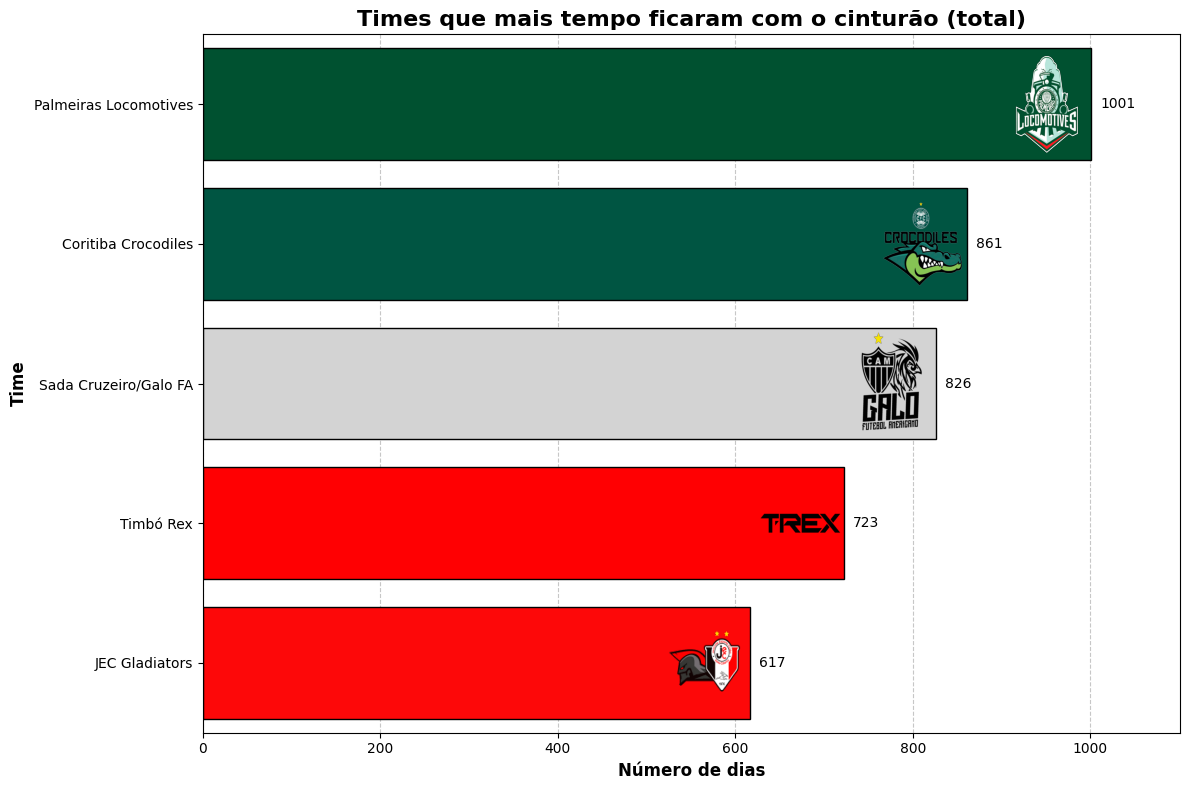

In [51]:
x = dias_com_titulo['Time'].to_list()[-5:]
y = dias_com_titulo['Dias'].to_list()[-5:]

cores = ['#FD0809', '#FF0002', '#D3D3D3', '#005542', '#005130']
image_url_list = ['https://www.salaooval.com.br/wp-content/uploads/2016/05/sc_jec_gladiators-128x128.png', 
                  'https://www.salaooval.com.br/wp-content/uploads/2018/12/sc_timbo_rex_alt.png',
                  'https://www.salaooval.com.br/wp-content/uploads/2018/12/mg_galo_fa_alt.png',
                  'https://www.salaooval.com.br/wp-content/uploads/2022/02/pr_coritiba_crocodiles_alt.png',
                  'https://www.salaooval.com.br/wp-content/uploads/2018/02/sp_palmeiras_locomotives.png'
                  ]

plot_barh(x, y, cores, image_url_list, 'Número de dias', 'Time', 'Times que mais tempo ficaram com o cinturão (total)', img_width=50, img_height=0.4, x_displacement=50, x_text_displacement=10)

In [52]:
dias_com_titulo_df = dias_com_titulo.sort_values(by=['Dias'], ascending=False)
dias_com_titulo_df

,Time,Dias
15,Palmeiras Locomotives,1001
0,Coritiba Crocodiles,861
1,Sada Cruzeiro/Galo FA,826
3,Timbó Rex,723
2,JEC Gladiators,617
4,Cuiabá Arsenal,403
7,Brown Spiders,361
6,Fluminense Imperadores,302
8,Contagem Inconfidentes,256
5,Paraná HP,181


# Equipes que ficaram mais tempo com o cinturão consecutivamente

In [53]:
teste = games_df[ (games_df['Vencedor'] == 'Brown Spiders') | (games_df['Defensor do Título'] == 'Brown Spiders') ]
teste

,Data,Mandante,Hor/Res,Visitante,Campo,Torneio,Fase,Pontos Mandante,Pontos Visitante,Vencedor,Defensor do Título
0,2008-10-25 14:00:00,Brown Spiders,33 - 10,Coritiba Crocodiles,NaN,Amistoso,NaN,33,10,Brown Spiders,-
1,2009-08-07 14:00:00,JEC Gladiators,08 - 21,Brown Spiders,NaN,torneio-touchdown-2009,NaN,8,21,Brown Spiders,Brown Spiders
2,2009-08-22 14:00:00,Brown Spiders,20 - 23,Coritiba Crocodiles,NaN,torneio-touchdown-2009,NaN,20,23,Coritiba Crocodiles,Brown Spiders
4,2009-10-11 14:00:00,Coritiba Crocodiles,12 - 20,Brown Spiders,NaN,torneio-touchdown-2009,NaN,12,20,Brown Spiders,Coritiba Crocodiles
5,2009-11-07 14:00:00,Brown Spiders,00 - 12,JEC Gladiators,NaN,torneio-touchdown-2009,NaN,0,12,JEC Gladiators,Brown Spiders
83,2016-03-13 09:00:18,Foz Black Sharks,00 - 20,Brown Spiders,Campo do Gresfi - Foz do Iguaçu/PR,campeonato-paranaense-2016,NaN,0,20,Brown Spiders,Foz Black Sharks
84,2016-04-02 14:00:58,Londrina Bristlebacks,09 - 39,Brown Spiders,Campo Estrela - Ibiporã/PR,campeonato-paranaense-2016,NaN,9,39,Brown Spiders,Brown Spiders
85,2016-04-16 14:00:15,Brown Spiders,12 - 13,Paraná HP,Croco Stadium - Curitiba/PR,campeonato-paranaense-2016,NaN,12,13,Paraná HP,Brown Spiders


In [54]:
print(286 + 15 + 27 + 20 + 14)

362


In [55]:
dias_com_cinturao_max = 0
dias_com_cinturao = 0
data_ultima_vitoria = None
formato_data = '%Y-%m-%d %H:%M:%S'

for index, row in teste.iterrows():
    if row['Vencedor'] == 'Brown Spiders':
        if data_ultima_vitoria is None:
            data_ultima_vitoria = datetime.strptime(row['Data'], formato_data)
        else:
            data_vitoria = datetime.strptime(row['Data'], formato_data)
            dias_com_cinturao += (data_vitoria - data_ultima_vitoria).days
            print(f"Atualização Dias - Vitória: {(data_vitoria - data_ultima_vitoria).days}")
            data_ultima_vitoria = data_vitoria

    else:
        data_derrota = datetime.strptime(row['Data'], formato_data)
        dias_com_cinturao += (data_derrota - data_ultima_vitoria).days
        print(f"Atualização Dias - Derrota: {(data_derrota - data_ultima_vitoria).days}")

        if dias_com_cinturao > dias_com_cinturao_max:
            dias_com_cinturao_max = dias_com_cinturao

        dias_com_cinturao = 0

        data_ultima_vitoria = None

print(dias_com_cinturao_max)

Atualização Dias - Vitória: 286
Atualização Dias - Derrota: 15
Atualização Dias - Derrota: 27
Atualização Dias - Vitória: 20
Atualização Dias - Derrota: 13
301


In [56]:
games_df['Vencedor'].value_counts()

Vencedor
Coritiba Crocodiles       37
Sada Cruzeiro/Galo FA     37
JEC Gladiators            23
Timbó Rex                 21
Cuiabá Arsenal            11
Paraná HP                 10
Fluminense Imperadores     6
Brown Spiders              5
Contagem Inconfidentes     4
Almirantes FA              2
Vasco Almirantes           2
América Locomotiva         2
São Paulo Storm            1
Istepôs FA                 1
Foz Black Sharks           1
Palmeiras Locomotives      1
Recife Mariners            1
Name: count, dtype: int64

In [57]:
resultados = []

for vencedor in games_df['Vencedor'].value_counts().index:
    cinturao_games_by_team = games_df[ (games_df['Vencedor'] == vencedor) | (games_df['Defensor do Título'] == vencedor) ].reset_index(drop=True)

    dias_com_cinturao = 0
    data_ultima_vitoria = None
    formato_data = '%Y-%m-%d %H:%M:%S'
    dias_com_cinturao_max = 0

    for index, row in cinturao_games_by_team.iterrows():
        if row['Vencedor'] == vencedor:
            if data_ultima_vitoria is None:
                data_ultima_vitoria = datetime.strptime(row['Data'], formato_data)
            else:
                data_vitoria = datetime.strptime(row['Data'], formato_data)
                dias_com_cinturao += (data_vitoria - data_ultima_vitoria).days
                # print(f"Atualização Dias - Vitória: {(data_vitoria - data_ultima_vitoria).days}")
                data_ultima_vitoria = data_vitoria

        else:
            data_derrota = datetime.strptime(row['Data'], formato_data)
            dias_com_cinturao += (data_derrota - data_ultima_vitoria).days
            # print(f"Atualização Dias - Derrota: {(data_derrota - data_ultima_vitoria).days}")

            if dias_com_cinturao > dias_com_cinturao_max:
                dias_com_cinturao_max = dias_com_cinturao

            dias_com_cinturao = 0

            data_ultima_vitoria = None

    if vencedor == 'Recife Mariners':
        data_hoje = datetime.strptime('2025-01-25 18:00:00', formato_data)
        dias_com_cinturao_max += (data_hoje - data_ultima_vitoria).days

    resultados.append({'Time': vencedor, 'Dias': dias_com_cinturao_max})

dias_com_titulo_consecutivos = pd.DataFrame(resultados)

dias_com_titulo_consecutivos.head()
    

,Time,Dias
0,Coritiba Crocodiles,472
1,Sada Cruzeiro/Galo FA,379
2,JEC Gladiators,309
3,Timbó Rex,367
4,Cuiabá Arsenal,322


In [58]:
dias_com_titulo_consecutivos = dias_com_titulo_consecutivos.sort_values(by=['Dias'], ascending=True)
dias_com_titulo_consecutivos

,Time,Dias
12,São Paulo Storm,6
9,Almirantes FA,34
11,América Locomotiva,34
10,Vasco Almirantes,40
13,Istepôs FA,42
16,Recife Mariners,55
5,Paraná HP,98
14,Foz Black Sharks,126
8,Contagem Inconfidentes,256
6,Fluminense Imperadores,287


In [59]:
games_df[ (games_df['Vencedor'] == 'Paraná HP') | (games_df['Defensor do Título'] == 'Paraná HP') ]

,Data,Mandante,Hor/Res,Visitante,Campo,Torneio,Fase,Pontos Mandante,Pontos Visitante,Vencedor,Defensor do Título
70,2015-03-14 14:00:18,Coritiba Crocodiles,07 - 14,Paraná HP,Centro Esportivo Fanático - Campo Largo/PR,campeonato-paranaense-2015,NaN,7,14,Paraná HP,Coritiba Crocodiles
71,2015-03-29 14:00:18,Maringá Pyros,09 - 38,Paraná HP,Estádio Municipal - Apucarana/PR,campeonato-paranaense-2015,NaN,9,38,Paraná HP,Paraná HP
72,2015-04-12 14:00:18,Paraná HP,81 - 06,Unicentro Knights,Centro Esportivo Fanático - Campo Largo/PR,campeonato-paranaense-2015,NaN,81,6,Paraná HP,Paraná HP
73,2015-04-25 14:00:18,Paraná HP,107 - 00,Norte Paraná,Centro Esportivo Fanático - Campo Largo/PR,campeonato-paranaense-2015,NaN,107,0,Paraná HP,Paraná HP
74,2015-05-09 14:00:18,Paraná HP,21 - 06,Brown Spiders,Centro Esportivo Fanático - Campo Largo/PR,campeonato-paranaense-2015,NaN,21,6,Paraná HP,Paraná HP
75,2015-05-30 14:00:18,PRC Guardian Saints,00 - 92,Paraná HP,Campo União Capão Raso - Curitiba/PR,campeonato-paranaense-2015,NaN,0,92,Paraná HP,Paraná HP
76,2015-06-20 14:00:18,Paraná HP,12 - 21,Coritiba Crocodiles,NaN,campeonato-paranaense-2015,NaN,12,21,Coritiba Crocodiles,Paraná HP
85,2016-04-16 14:00:15,Brown Spiders,12 - 13,Paraná HP,Croco Stadium - Curitiba/PR,campeonato-paranaense-2016,NaN,12,13,Paraná HP,Brown Spiders
86,2016-05-01 14:00:11,Paraná HP,75 - 07,Londrina Bristlebacks,Centro Esportivo Fanático - Campo Largo/PR,campeonato-paranaense-2016,NaN,75,7,Paraná HP,Paraná HP
87,2016-05-29 14:00:52,Paraná HP,41 - 00,Londrina Bristlebacks,NaN,campeonato-paranaense-2016,NaN,41,0,Paraná HP,Paraná HP


In [60]:
x = dias_com_titulo_consecutivos['Time'].to_list()[-5:]
y = dias_com_titulo_consecutivos['Dias'].to_list()[-5:]
x, y

(['Cuiabá Arsenal',
  'Timbó Rex',
  'Sada Cruzeiro/Galo FA',
  'Coritiba Crocodiles',
  'Palmeiras Locomotives'],
 [322, 367, 379, 472, 1001])

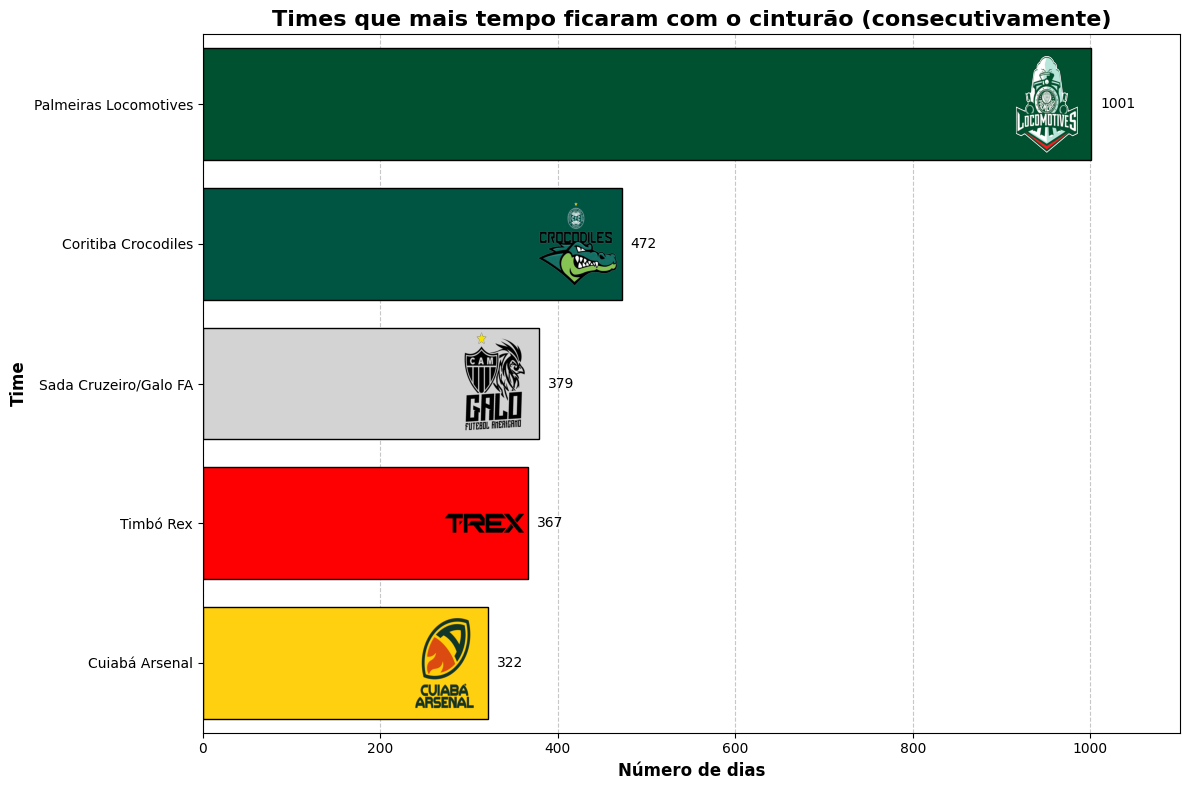

In [61]:
x = dias_com_titulo_consecutivos['Time'].to_list()[-5:]
y = dias_com_titulo_consecutivos['Dias'].to_list()[-5:]

cores = ['#FFD010', '#FF0002', '#D3D3D3', '#005542', '#005130']
image_url_list = ['https://www.salaooval.com.br/wp-content/uploads/2018/12/mt_cuiaba_arsenal_alt.png', 
                  'https://www.salaooval.com.br/wp-content/uploads/2018/12/sc_timbo_rex_alt.png',
                  'https://www.salaooval.com.br/wp-content/uploads/2018/12/mg_galo_fa_alt.png',
                  'https://www.salaooval.com.br/wp-content/uploads/2022/02/pr_coritiba_crocodiles_alt.png',
                  'https://www.salaooval.com.br/wp-content/uploads/2018/02/sp_palmeiras_locomotives.png'
                  ]

plot_barh(x, y, cores, image_url_list, 'Número de dias', 'Time', 'Times que mais tempo ficaram com o cinturão (consecutivamente)', img_width=50, img_height=0.4, x_displacement=50, x_text_displacement=10)

In [62]:
dias_com_titulo_df = dias_com_titulo.sort_values(by=['Dias'], ascending=False)
dias_com_titulo_df

,Time,Dias
15,Palmeiras Locomotives,1001
0,Coritiba Crocodiles,861
1,Sada Cruzeiro/Galo FA,826
3,Timbó Rex,723
2,JEC Gladiators,617
4,Cuiabá Arsenal,403
7,Brown Spiders,361
6,Fluminense Imperadores,302
8,Contagem Inconfidentes,256
5,Paraná HP,181


# Times que em mais partidas consecutivas ficaram com o cinturão

In [67]:
resultados = []
for vencedor in games_df['Vencedor'].value_counts().index:
    cinturao_games_by_team = games_df[ (games_df['Vencedor'] == vencedor) | (games_df['Defensor do Título'] == vencedor) ].reset_index(drop=True)

    jogos_com_cinturao = 0
    jogos_com_cinturao_max = 0

    for index, row in cinturao_games_by_team.iterrows():
        if row['Vencedor'] == vencedor:
            jogos_com_cinturao += 1

        else:
            if jogos_com_cinturao > jogos_com_cinturao_max:
                jogos_com_cinturao_max = jogos_com_cinturao

            jogos_com_cinturao = 0

    


    resultados.append({'Time': vencedor, 'Jogos': jogos_com_cinturao_max})

jogos_com_titulo_consecutivos = pd.DataFrame(resultados)

jogos_com_titulo_consecutivos.head()

,Time,Jogos
0,Coritiba Crocodiles,17
1,Sada Cruzeiro/Galo FA,17
2,JEC Gladiators,12
3,Timbó Rex,15
4,Cuiabá Arsenal,7


In [68]:
jogos_com_titulo_consecutivos = jogos_com_titulo_consecutivos.sort_values(by=['Jogos'], ascending=True)

In [73]:
x = jogos_com_titulo_consecutivos['Time'].to_list()[-5:]
y = jogos_com_titulo_consecutivos['Jogos'].astype(int).to_list()[-5:]
x, y

(['Cuiabá Arsenal',
  'JEC Gladiators',
  'Timbó Rex',
  'Sada Cruzeiro/Galo FA',
  'Coritiba Crocodiles'],
 [7, 12, 15, 17, 17])

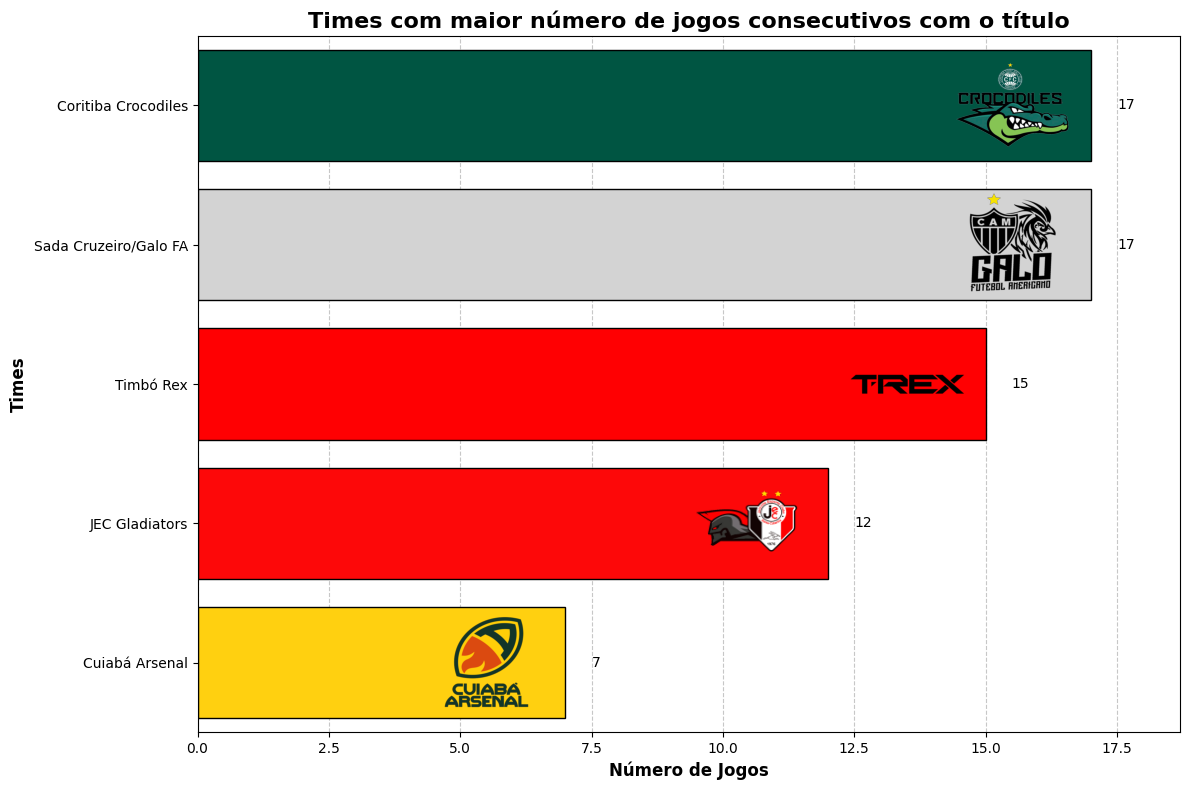

In [74]:
x = jogos_com_titulo_consecutivos['Time'].to_list()[-5:]
y = jogos_com_titulo_consecutivos['Jogos'].astype(int).to_list()[-5:]

cores = ['#FFD010', '#FD0809', '#FF0002',  '#D3D3D3', '#005542']
image_url_list = ['https://www.salaooval.com.br/wp-content/uploads/2018/12/mt_cuiaba_arsenal_alt.png', 
                  'https://www.salaooval.com.br/wp-content/uploads/2016/05/sc_jec_gladiators-128x128.png',
                  'https://www.salaooval.com.br/wp-content/uploads/2018/12/sc_timbo_rex_alt.png', 
                  'https://www.salaooval.com.br/wp-content/uploads/2018/12/mg_galo_fa_alt.png', 
                  'https://www.salaooval.com.br/wp-content/uploads/2022/02/pr_coritiba_crocodiles_alt.png']

plot_barh(x, y, cores, image_url_list, 'Número de Jogos', 'Times', 'Times com maior número de jogos consecutivos com o título', img_width=1.2, img_height=0.4, x_displacement=1.5, x_text_displacement=0.5)